In [1]:
import matplotlib.pyplot as plt
import kinetic_MC as kmc
import numpy as np
import time

## Test of the functions

In [2]:
N = 32
particle_number = int(N*N/4)
Beta = 0.15
Test_lattice = kmc.Lattice(N = N, particle_number = particle_number, Beta = Beta)

In [3]:
%%time

it_num = 2000
cors = kmc.simulate_TD_correlations(Lattice = Test_lattice, it_num = it_num)

CPU times: user 20.8 s, sys: 9.76 ms, total: 20.8 s
Wall time: 20.8 s


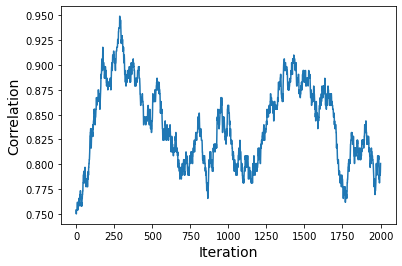

In [4]:
plt.plot(cors/particle_number)
plt.xlabel("Iteration",fontsize = 14)
plt.ylabel("Correlation", fontsize = 14)
plt.show()

## Results

In [5]:
d = np.loadtxt("./data/kinetic_MC_data_v4")

N = 32
particle_number = int(N*N/4)
Betas = np.linspace(0.7,1.3,50)
it_num = 10000

Text(0.5, 0, '$ \\beta $')

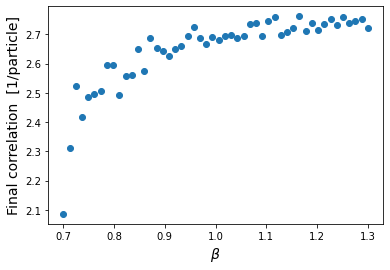

In [6]:
fig = plt.figure()

plt.scatter(Betas,d)
plt.ylabel(r"Final correlation  [1/particle]", fontsize = 14)
plt.xlabel(r"$ \beta $", fontsize = 14)

I guess I should see something around these $\beta$ values but I don't really know what to look for.

## Final result

After a few shots I eventually decided to increase the number of iterations and use finer sampling for the $\beta$ values. Because of the long time needed to run the simulations, I used the IBM Quantum Lab web service to carry out the calculations there.

In [7]:
N = 32
particle_number = int(N*N/4)
Betas = np.linspace(0.4,1.6,50)

it_num = 50000

In [8]:
data = np.loadtxt("./data/kinetic_MC_data_v5")

Text(0.5, 0, '$ \\beta $')

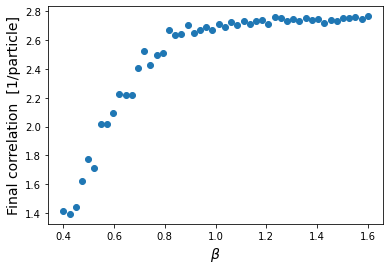

In [9]:
fig = plt.figure()

plt.scatter(Betas,data)
plt.ylabel(r"Final correlation  [1/particle]", fontsize = 14)
plt.xlabel(r"$ \beta $", fontsize = 14)

In [10]:
from scipy.optimize import curve_fit

In [11]:
def func(x,a,b,c,d):
    return a+b*pow(x-c,d)

In [12]:
bounds = ([0.,0.,0.3,0.1],[4.,10.,0.39,10.])
p,pcov = curve_fit(func, Betas[:22], data[:22], p0 = [1.4,2,0.35,0.4], maxfev = 100000,bounds = bounds)

In [13]:
p

array([3.86219508e-14, 3.35373720e+00, 3.27529087e-01, 3.62328424e-01])

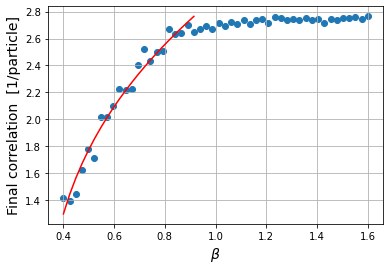

In [14]:
y = func(Betas[:22],p[0],p[1],p[2],p[3])

fig = plt.figure()

plt.scatter(Betas,data)
plt.plot(Betas[:22],y,color = "red")
plt.ylabel(r"Final correlation  [1/particle]", fontsize = 14)
plt.xlabel(r"$ \beta $", fontsize = 14)
plt.grid(True)

### Phase transition point maybe near $\beta \approx 1.2$.
### But $\beta \approx 0.8$ would also be a good candidate in my opinion.